In [1]:
import numpy as np
import random
import os
import math
from itertools import product

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


from glob import glob
import pandas as pd
import cv2
from tqdm.auto import tqdm
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
# from torch.utils.tensorboard import SummaryWriter

from torch.autograd import Variable

import torchvision.models as models
from torchvision import transforms

import albumentations as A
import albumentations.pytorch

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device} device")

Using cuda device


In [28]:
CFG = {
    'IMG_SIZE':256,
    'EPOCHS':10,
    'class':20
}

In [33]:
def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    
    image_path = os.path.join(data_dir, 'image')
    
    for product_name in os.listdir(image_path):
        product_path = os.path.join(image_path, product_name)
        if os.path.isdir(product_path):
            # get image path
            img_path_list.extend(glob(os.path.join(product_path, '*.jpg')))
            img_path_list.extend(glob(os.path.join(product_path, '*.png')))
            label = list(product_name[:5])
            
            # get label
            label_list.append(''.join(label))
                
    return img_path_list, label_list

In [34]:
img_list, label_list = get_train_data('/home/lab17/jupyter_home/Data/product_image/Training/')

In [35]:
# img_list

In [36]:
label_list

['35102',
 '55701',
 '65753',
 '66304',
 '35192',
 '45661',
 '35954',
 '35189',
 '35191',
 '25607',
 '66309',
 '35196',
 '45678',
 '35211',
 '45659',
 '35193',
 '35270',
 '35274',
 '35953',
 '25222',
 '35272',
 '35194',
 '35265',
 '35273',
 '65738',
 '35584',
 '45204',
 '45203',
 '35563',
 '46020',
 '55034',
 '55798',
 '35190',
 '35955',
 '65754',
 '45660',
 '45470',
 '55845',
 '65742',
 '65752',
 '45679',
 '35266',
 '35195',
 '66308',
 '35583',
 '45471',
 '65736',
 '35587',
 '65740',
 '35269',
 '10268',
 '46018',
 '35585',
 '70208',
 '35271',
 '45658',
 '55702',
 '45468',
 '35586',
 '46019',
 '45469',
 '45030',
 '45657',
 '65744',
 '35268',
 '45662',
 '35267',
 '45467',
 '10242',
 '25228',
 '60195',
 '46017',
 '65739',
 '35188',
 '45680',
 '25223']

In [37]:
def data_blanced(img, label):
    x = []
    y = []
    
    for i in range(CFG['class']):
        _img = img[(i * 114): ((i + 1) * 114)]
        _label = label[i]
        
        for img_product in _img:
            x.append(img_product)
            y.append(_label)
            
    return x, y

In [38]:
x, y = data_blanced(img_list, label_list)

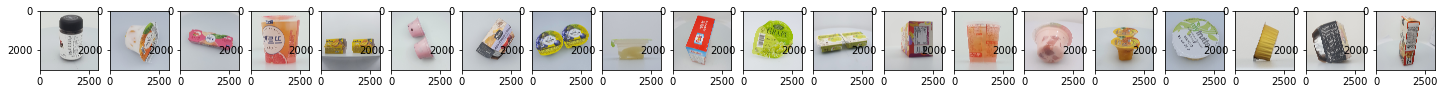

In [62]:
num_samples = CFG['class']
num = 2
i = 0

fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))

for a in ax:
    image = cv2.imread(x[i*114])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    a.imshow(image)
    i+=1
plt.show()


In [61]:
for i in range(CFG['class']):
    print(img_list[i*114][59:])

35102_삼양사)건포도150G/35102_30_s_6.jpg
55701_쁘띠첼요거젤리밀감/55701_60_s_21.jpg
65753_매일데르뜨복숭아3개입90G_3/65753_60_s_14.jpg
66304_매일데르뜨자몽130G/66304_00_s_3.jpg
35192_신선에프앤브이)파인애플컵400G/35192_00_m_15.jpg
45661_씨제이)쁘티첼(요거젤리블루베리)/45661_60_m_18.jpg
35954_팜팩토리)아넬라사과_자두디저트/35954_60_s_9.jpg
35189_CJ쟈뎅)쁘띠첼과일젤리포도90G/35189_60_m_24.jpg
35191_CJ쟈뎅)쁘띠첼과일젤리복숭아90G/35191_00_s_4.jpg
25607_돌코리아애플팝496ML/25607_60_s_20.jpg
66309_풍림푸드피코크포도젤리90G/66309_30_s_1.jpg
35196_엠디에스코리아)사과푸딩220G/35196_30_m_24.jpg
45678_롯데제과)디저뜨와(구운치즈케이크타르트)/45678_00_s_6.jpg
35211_매일유업)데르뜨130G/35211_00_s_13.jpg
45659_씨제이)쁘티첼(요거젤리딸기)/45659_30_s_13.jpg
35193_신선에프앤브이)파인애플컵100G/35193_30_m_19.jpg
35270_홈플러스)마이프루타애플앤망고100G/35270_60_s_5.jpg
35274_홈플러스)마이프루타애플앤블루베리100G/35274_00_s_7.jpg
35953_팜팩토리)아넬라사과_바나나디저트/35953_00_s_20.jpg
25222_대만)망고케익184g/25222_30_s_6.jpg


35102_삼양사)건포도150G/35102_30_s_6.jpg


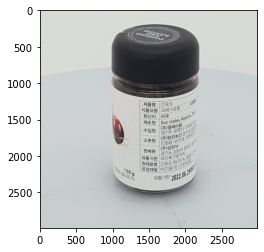

55701_쁘띠첼요거젤리밀감/55701_60_s_21.jpg


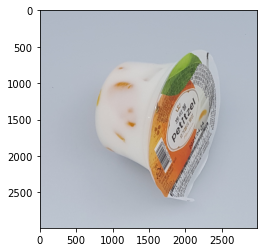

65753_매일데르뜨복숭아3개입90G_3/65753_60_s_14.jpg


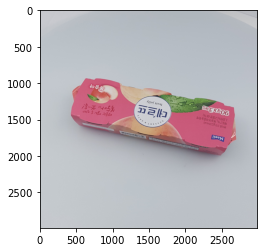

66304_매일데르뜨자몽130G/66304_00_s_3.jpg


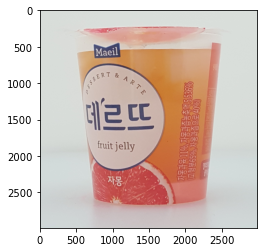

35192_신선에프앤브이)파인애플컵400G/35192_00_m_15.jpg


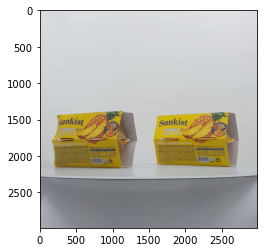

45661_씨제이)쁘티첼(요거젤리블루베리)/45661_60_m_18.jpg


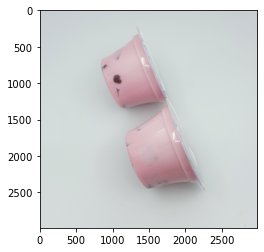

35954_팜팩토리)아넬라사과_자두디저트/35954_60_s_9.jpg


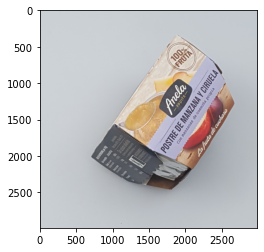

35189_CJ쟈뎅)쁘띠첼과일젤리포도90G/35189_60_m_24.jpg


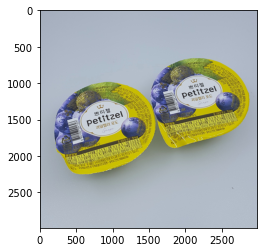

35191_CJ쟈뎅)쁘띠첼과일젤리복숭아90G/35191_00_s_4.jpg


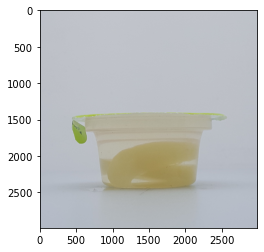

25607_돌코리아애플팝496ML/25607_60_s_20.jpg


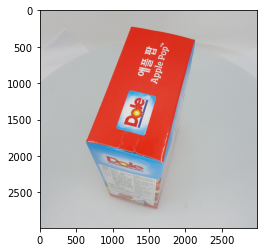

66309_풍림푸드피코크포도젤리90G/66309_30_s_1.jpg


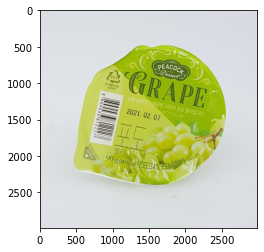

35196_엠디에스코리아)사과푸딩220G/35196_30_m_24.jpg


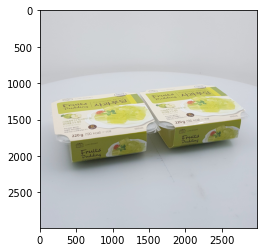

45678_롯데제과)디저뜨와(구운치즈케이크타르트)/45678_00_s_6.jpg


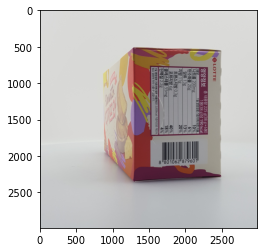

35211_매일유업)데르뜨130G/35211_00_s_13.jpg


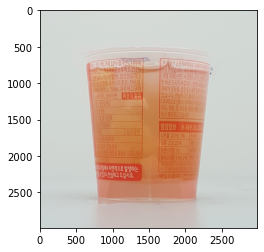

45659_씨제이)쁘티첼(요거젤리딸기)/45659_30_s_13.jpg


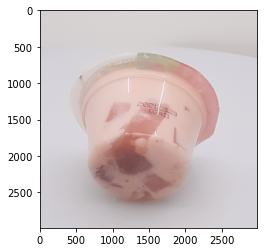

35193_신선에프앤브이)파인애플컵100G/35193_30_m_19.jpg


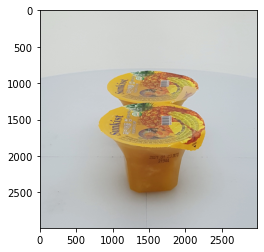

35270_홈플러스)마이프루타애플앤망고100G/35270_60_s_5.jpg


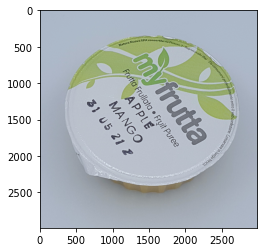

35274_홈플러스)마이프루타애플앤블루베리100G/35274_00_s_7.jpg


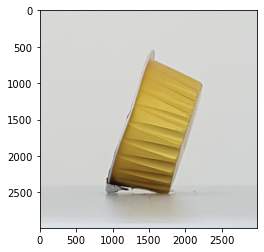

35953_팜팩토리)아넬라사과_바나나디저트/35953_00_s_20.jpg


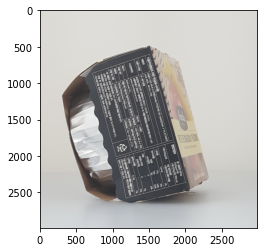

25222_대만)망고케익184g/25222_30_s_6.jpg


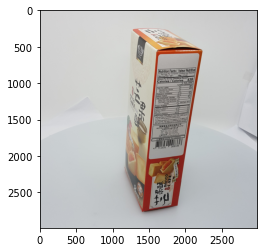

In [64]:
num_samples = CFG['class']
for i in range(num_samples):
    print(img_list[i*114][59:])
    image = cv2.imread(x[i*114])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [65]:
# 레이블을 one-hot-vector로 변환
le = preprocessing.LabelEncoder()
targets = le.fit_transform(y)
targets = torch.as_tensor(targets)
one_hot_y = F.one_hot(targets)

In [66]:
one_hot_y.shape

torch.Size([2280, 20])

In [68]:
one_hot_y

tensor([[0, 0, 1,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]])

### Validation Data Loader

In [69]:
def get_valid_data(data_dir):
    img_valid_list = []
    label_valid_list = []
    
    image_path = os.path.join(data_dir, 'image')
    
    for product_name in os.listdir(image_path):
        product_path = os.path.join(image_path, product_name)
        if os.path.isdir(product_path):
            # get image path
            img_valid_list.extend(glob(os.path.join(product_path, '*.jpg')))
            img_valid_list.extend(glob(os.path.join(product_path, '*.png')))
            label = list(product_name[:5])
            
            # get label
            label_valid_list.append(''.join(label))
                
    return img_valid_list, label_valid_list

In [70]:
def valid_data_blanced(img, label):
    x = []
    y = []
    
    for i in range(CFG['class']):
        _img = img[(i * 15): ((i + 1) * 15)]
        _label = label[i]
        
        for img_product in _img:
            x.append(img_product)
            y.append(_label)
            
    return x, y

In [71]:
img_valid_list, label_valid_list = get_valid_data('/home/lab17/jupyter_home/Data/product_image/Validation/')
x_valid, y_valid = valid_data_blanced(img_valid_list, label_valid_list)
len(label_valid_list)

76

In [72]:
le2 = preprocessing.LabelEncoder()
targets_y = le2.fit_transform(y_valid)
targets_y = torch.as_tensor(targets_y)
one_hot_valid_y = F.one_hot(targets_y)
one_hot_valid_y.shape

torch.Size([300, 20])

# Augmentation

 - noramlize X

In [73]:
class AlbumentationsCustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, train_mode=True, transforms=None):
        self.transforms = transforms
        self.train_mode = train_mode
        self.img_path_list = img_path_list
        self.label_list = label_list

    def __getitem__(self, index):
        img_path = self.img_path_list[index]
        # Get image data
        image = cv2.imread(img_path)
        
        # By default OpenCV uses BGR color space for color images,
        # so we need to convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.train_mode:
#             image = image.astype(np.int16)
            augmented = self.transforms(image=image)
            image = augmented['image']
            label = self.label_list[index]
            return image, label
        else:
            image = self.transforms(image)
            label = self.label_list[index]
            return image, label
    
    def __len__(self):
        return len(self.img_path_list)

In [74]:
A_train_transform = albumentations.Compose([
                                    A.Resize(256, 256),
#                                     albumentations.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
#                                     A.Normalize(mean=[0.485, 0.456, 0.406],
#                                                 std=[0.229, 0.224, 0.225]),
                                    A.RandomCrop(224, 224),
                                    A.RandomBrightness(limit=0.4, p=0.5),
                                    A.ShiftScaleRotate(rotate_limit=20, p=0.5, border_mode=cv2.BORDER_CONSTANT),
                                    A.pytorch.transforms.ToTensorV2(),
                                ])
A_test_transform = albumentations.Compose([
                                    A.Resize(256, 256),
#                                     albumentations.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
#                                     A.Normalize(mean=[0.485, 0.456, 0.406],
#                                                 std=[0.229, 0.224, 0.225]),    
                                    A.pytorch.transforms.ToTensorV2()
                                ])

In [75]:
A_train_dataset = AlbumentationsCustomDataset(x, one_hot_y, train_mode=True, transforms=A_train_transform)
A_train_loader = DataLoader(A_train_dataset, batch_size = 32, shuffle=True, num_workers=0, collate_fn=None)

A_vali_dataset = AlbumentationsCustomDataset(x_valid, one_hot_valid_y, train_mode=True, transforms=A_test_transform)
A_vali_loader = DataLoader(A_vali_dataset, batch_size = 5, shuffle=False, num_workers=0, collate_fn=None)

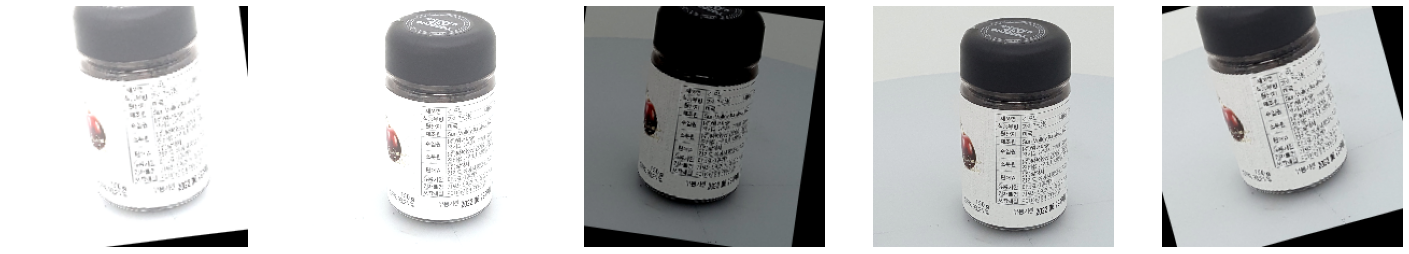

In [76]:
num_samples = 5

fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))

for i in range(num_samples):
    ax[i].imshow(transforms.ToPILImage()(A_train_dataset[0][0]))
    ax[i].axis('off')

### Normalize 추가

In [77]:
A_train_transform_normal = albumentations.Compose([
                                    A.Resize(256, 256),
                                    albumentations.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
#                                     A.Normalize(mean=[0.485, 0.456, 0.406],
#                                                 std=[0.229, 0.224, 0.225]),
                                    A.RandomCrop(224, 224),
                                    A.RandomBrightness(limit=0.4, p=0.5),
                                    A.ShiftScaleRotate(rotate_limit=20, p=0.5, border_mode=cv2.BORDER_CONSTANT),
                                    A.pytorch.transforms.ToTensorV2(),
                                ])
A_test_transform = albumentations.Compose([
                                    A.Resize(256, 256),
                                    albumentations.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
#                                     A.Normalize(mean=[0.485, 0.456, 0.406],
#                                                 std=[0.229, 0.224, 0.225]),    
                                    A.pytorch.transforms.ToTensorV2()
                                ])

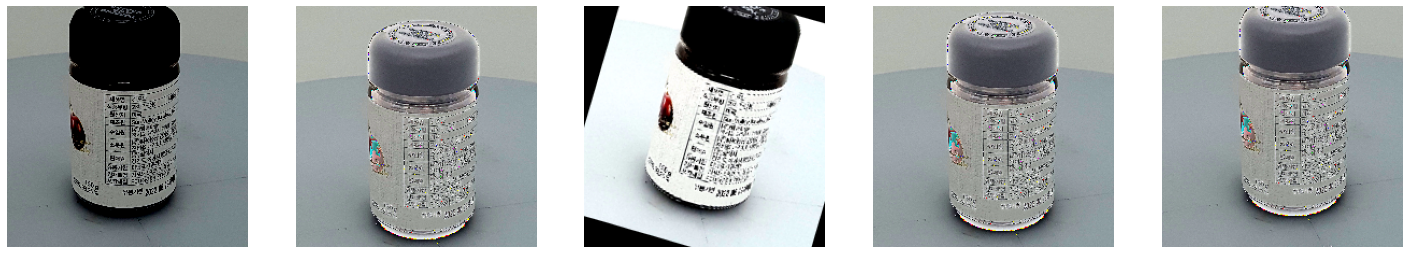

In [78]:
A_train_dataset = AlbumentationsCustomDataset(x, one_hot_y, train_mode=True, transforms=A_train_transform_normal)

num_samples = 5

fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))

for i in range(num_samples):
    ax[i].imshow(transforms.ToPILImage()(A_train_dataset[0][0]))
    ax[i].axis('off')

### validation 이미지

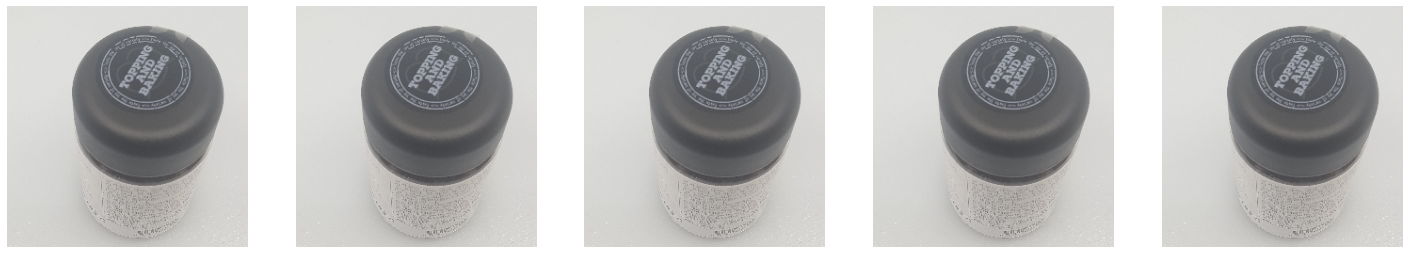

In [80]:
num_samples = 5

fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))

for i in range(num_samples):
    ax[i].imshow(transforms.ToPILImage()(A_vali_dataset[0][0]))
    ax[i].axis('off')

# Models

In [21]:
class ResNet50(torch.nn.Module):
    def __init__(self):
        super(ResNet50, self).__init__()
        model = models.resnet50(pretrained=True)
        modules = list(model.children())[:-1]
        self.feature_extract = nn.Sequential(*modules)
        self.fc1 = nn.Linear(2048, 1000)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1000,CFG['class'])
        self.softmax = nn.Softmax(dim=0)

    def forward(self, x):
        x = self.feature_extract(x)
        # x = x.mean(dim=(-2, -1))
        # (batch, 2048, 4, 4)
        x = torch.squeeze(x)
        x = self.relu(self.fc1(x))
        out = self.fc2(x)
        return out

In [22]:
class EfficientNetb4(torch.nn.Module):
    def __init__(self):
        super(EfficientNetb4, self).__init__()
        model = models.efficientnet_b4(pretrained=True)
        modules = list(model.children())[:-1]
        self.feature_extract = nn.Sequential(*modules)
        self.fc1 = nn.Linear(1792, 1000)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1000,CFG['class'])
        self.softmax = nn.Softmax(dim=0)
        
    def forward(self, x):
        x = self.feature_extract(x)
        # (batch, 1792, 1, 1)
        x = torch.squeeze(x)
        x = self.relu(self.fc1(x))
        out = self.fc2(x)
        return out

In [23]:
class RegNet(torch.nn.Module):
    def __init__(self):
        super(RegNet, self).__init__()
        model = models.regnet_y_16gf(pretrained=True)
        modules = list(model.children())[:-1]
        self.feature_extract = nn.Sequential(*modules)
        self.fc1 = nn.Linear(3024, 1000)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1000,CFG['class'])
        self.softmax = nn.Softmax(dim=0)
        
    def forward(self, x):
        x = self.feature_extract(x)
        # (batch, 3024, 1, 1)
        x = torch.squeeze(x)
        x = self.relu(self.fc1(x))
        out = self.fc2(x)
        return out

In [24]:
PARAMS = {
    'models' : ['ResNet50', 'EfficientNetb4', 'RegNet'],
    'learning_rate' : [1e-2, 1e-3, 1e-4, 1e-5],
    'optimizer' : ['adam', 'rmsprop', 'nadam'],
}
hyper_params=list(product(PARAMS['models'], PARAMS['learning_rate'],PARAMS['optimizer']))

In [25]:
def draw_graph(title, loss, valid_loss):
    plt.plot(loss, label="Training Loss")
    plt.plot(valid_loss, label="Validation Loss")
    plt.legend(loc='upper right')
    plt.title(title)
    plt.savefig("./result/loss_chart/" + title + ".png")
    plt.show()

In [26]:
def validation(model, vali_loader, criterion, device, epoch):
    model.eval() # Evaluation
    vali_loss = []

    with torch.no_grad():
        for img, label in tqdm(iter(vali_loader)):
            img, label = img.float().to(device), label.float().to(device)

            logit = model(img)
            logit = torch.squeeze(logit)
            loss = criterion(logit, label)
            
            vali_loss.append(loss.item())

    vali_mae_loss = np.mean(vali_loss)
    return vali_mae_loss

In [27]:
def train(model, optimizer, train_loader, vali_loader, scheduler, device, params):
    
    model.to(device)
    epochs = 3
    
    loss_plot = []
    vali_loss_plot = []
    patience = 5
    earlystopping = 0

    # Loss Function
    criterion = torch.nn.CrossEntropyLoss()
    best_loss = 9999
    
    print("--------------------------------------------")
    print("model : {}".format(params[0]))
    print("optimizer : {}, learning rate : {}".format(params[2], params[1]))
    
    for epoch in range(1,epochs+1):
        model.train()
        train_loss = []
        for img, label in tqdm(iter(train_loader)):
            img, label = img.float().to(device), label.float().to(device)
            
            optimizer.zero_grad()

            # Data -> Model -> Output
            logit = model(img)
            logit = torch.squeeze(logit)
            # Calc loss
            loss = criterion(logit, label)
#             loss_plot.append(loss.item())

            # backpropagation
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())
            
        if scheduler is not None:
            scheduler.step()
            
        # Evaluation Validation set
        vali_loss = validation(model, vali_loader, criterion, device, epoch)
        loss_plot.append(np.mean(train_loss))
        vali_loss_plot.append(vali_loss)
        
        print(f'Epoch [{epoch}] Train loss : [{np.mean(train_loss):.5f}] Validation loss : [{vali_loss:.5f}]\n')
        
        # Model Saved
        if best_loss > vali_loss:
            best_loss = vali_loss
            torch.save(model.state_dict(), '/content/drive/MyDrive/project/saved_models/{}_{}_{}_example.pth'.format(params[0], params[1], params[2]))
            print('------------------ Model Saved ------------------')
            earlystopping = 0
        elif best_loss < vali_loss:
            earlystopping += 1
            if earlystopping == patience:
                print("------------stop----------------")
                title = "{}_{}_{}_epoch_{}_loss".format(params[0], params[1], params[2], epoch)
                draw_graph(title, loss_plot, vali_loss_plot)
                break
                
        if epochs == epoch:
            title = "{}_{}_{}_epoch_{}_loss".format(params[0], params[1], params[2], epoch)
            draw_graph(title, loss_plot, vali_loss_plot)

In [ ]:
for params in hyper_params:
    
    scheduler = None
    
    # model
    if params[0] == 'ResNet50':
        model = ResNet50()
            # optimizer
        if params[2] == 'adam':
            optimizer = torch.optim.Adam(model.parameters(), lr=params[1])
        elif params[2] == 'rmsprop':
            optimizer = torch.optim.RMSprop(model.parameters(), lr=params[1])
        elif params[2] == 'nadam':
            optimizer = torch.optim.NAdam(model.parameters(), lr=params[1])
            
    
        train(model, optimizer, A_train_loader, A_vali_loader, scheduler, device, params)

        
        
    elif params[0] == 'EfficientNetb4':
        model = EfficientNetb4()
            # optimizer
        if params[2] == 'adam':
            optimizer = torch.optim.Adam(model.parameters(), lr=params[1])
        elif params[2] == 'rmsprop':
            optimizer = torch.optim.RMSprop(model.parameters(), lr=params[1])
        elif params[2] == 'nadam':
            optimizer = torch.optim.NAdam(model.parameters(), lr=params[1])
            
        train(model, optimizer, A_train_loader, A_vali_loader, scheduler, device, params)

        
    elif params[0] == 'RegNet':
        model = RegNet()
        if params[2] == 'adam':
            optimizer = torch.optim.Adam(model.parameters(), lr=params[1])
        elif params[2] == 'rmsprop':
            optimizer = torch.optim.RMSprop(model.parameters(), lr=params[1])
        elif params[2] == 'nadam':
            optimizer = torch.optim.NAdam(model.parameters(), lr=params[1])
            
        train(model, optimizer, A_train_loader, A_vali_loader, scheduler, device, params)

--------------------------------------------
model : ResNet50
optimizer : adam, learning rate : 0.01


  0%|          | 0/18 [00:00<?, ?it/s]